In [1]:
#pip install lightgbm

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [99]:
# Load the dataset from a CSV file
dt = pd.read_csv("/Users/kagunda.2/Desktop/data-science-may-2024/data/AAPL.csv")
#df = pd.read_csv(path_to_dataset)

In [100]:
dt.info


<bound method DataFrame.info of          date     close     volume
0      2/8/13   67.8542  158168416
1     2/11/13   68.5614  129029425
2     2/12/13   66.8428  151829363
3     2/13/13   66.7156  118721995
4     2/14/13   66.6556   88809154
...       ...       ...        ...
1254   2/1/18  167.7800   47230787
1255   2/2/18  160.5000   86593825
1256   2/5/18  156.4900   72738522
1257   2/6/18  163.0300   68243838
1258   2/7/18  159.5400   51608580

[1259 rows x 3 columns]>

In [101]:
import pandas as pd


In [103]:

dt_train = dt.iloc[:-200].copy()
dt_test = dt.iloc[-200:].copy()

In [104]:
list_of_column_names = list(dt.columns)
 
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['date', 'close', 'volume']


In [105]:
dt_train

,date,close,volume
0,2/8/13,67.8542,158168416
1,2/11/13,68.5614,129029425
2,2/12/13,66.8428,151829363
3,2/13/13,66.7156,118721995
4,2/14/13,66.6556,88809154
...,...,...,...
1054,4/18/17,141.2000,14697544
1055,4/19/17,140.6800,17328375
1056,4/20/17,142.4400,23319562
1057,4/21/17,142.2700,17320928


In [107]:
dt_test

,date,close,volume
1059,4/25/17,144.53,18871501
1060,4/26/17,143.68,20041241
1061,4/27/17,143.79,14246347
1062,4/28/17,143.65,20860358
1063,5/1/17,146.58,33602943
...,...,...,...
1254,2/1/18,167.78,47230787
1255,2/2/18,160.50,86593825
1256,2/5/18,156.49,72738522
1257,2/6/18,163.03,68243838


In [109]:
## To use rolling
## specify the column you want the rolling average of
## give the window size as the argument
## then give what you want the rolling statistic of, we want the mean()
## Finally set the argument closed='left' to ensure that y_{t+1} is the average
## of the previous k values.
pd.DataFrame({'close':dt_train.close,
                  'rolling_avg':dt_train.close.rolling(3,
                                closed='left').mean()})

,close,rolling_avg
0,67.8542,NaN
1,68.5614,NaN
2,66.8428,NaN
3,66.7156,67.752800
4,66.6556,67.373267
...,...,...
1054,141.2000,141.560000
1055,140.6800,141.360000
1056,142.4400,141.236667
1057,142.2700,141.440000


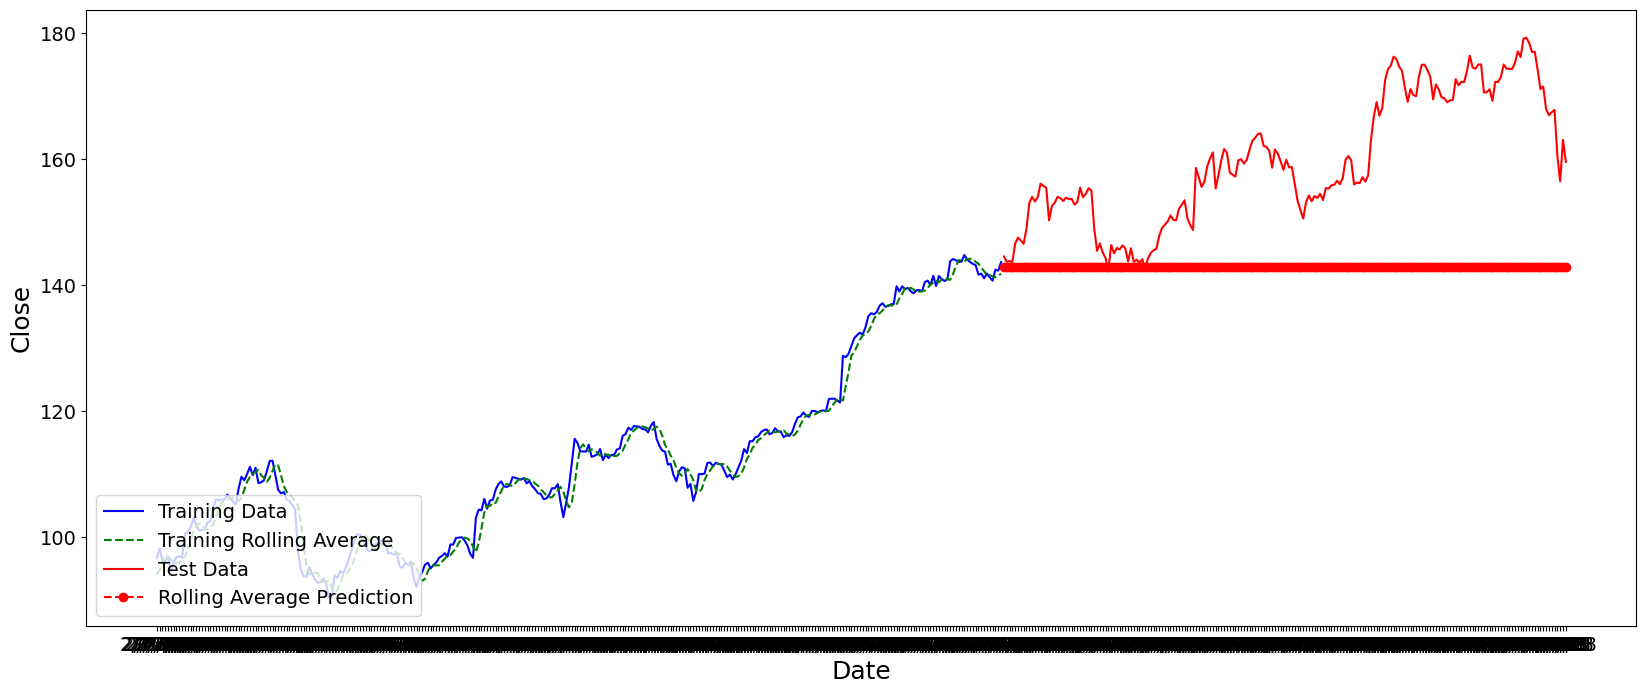

In [114]:
plt.figure(figsize=(20,8))


plt.plot(dt_train.date[-300:], 
         dt_train.close[-300:],
         'b',
         label="Training Data")

plt.plot(dt_train.date[-300:], 
         dt_train.close.rolling(3, closed="left").mean()[-300:],
         'g--',
         label="Training Rolling Average")

plt.plot(dt_test.date, 
         dt_test.close,
         'r',
         label="Test Data")

plt.plot(dt_test.date, 
         dt_train.close[-3:].mean()*np.ones(200),
         'r--o',
         label="Rolling Average Prediction")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Close", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

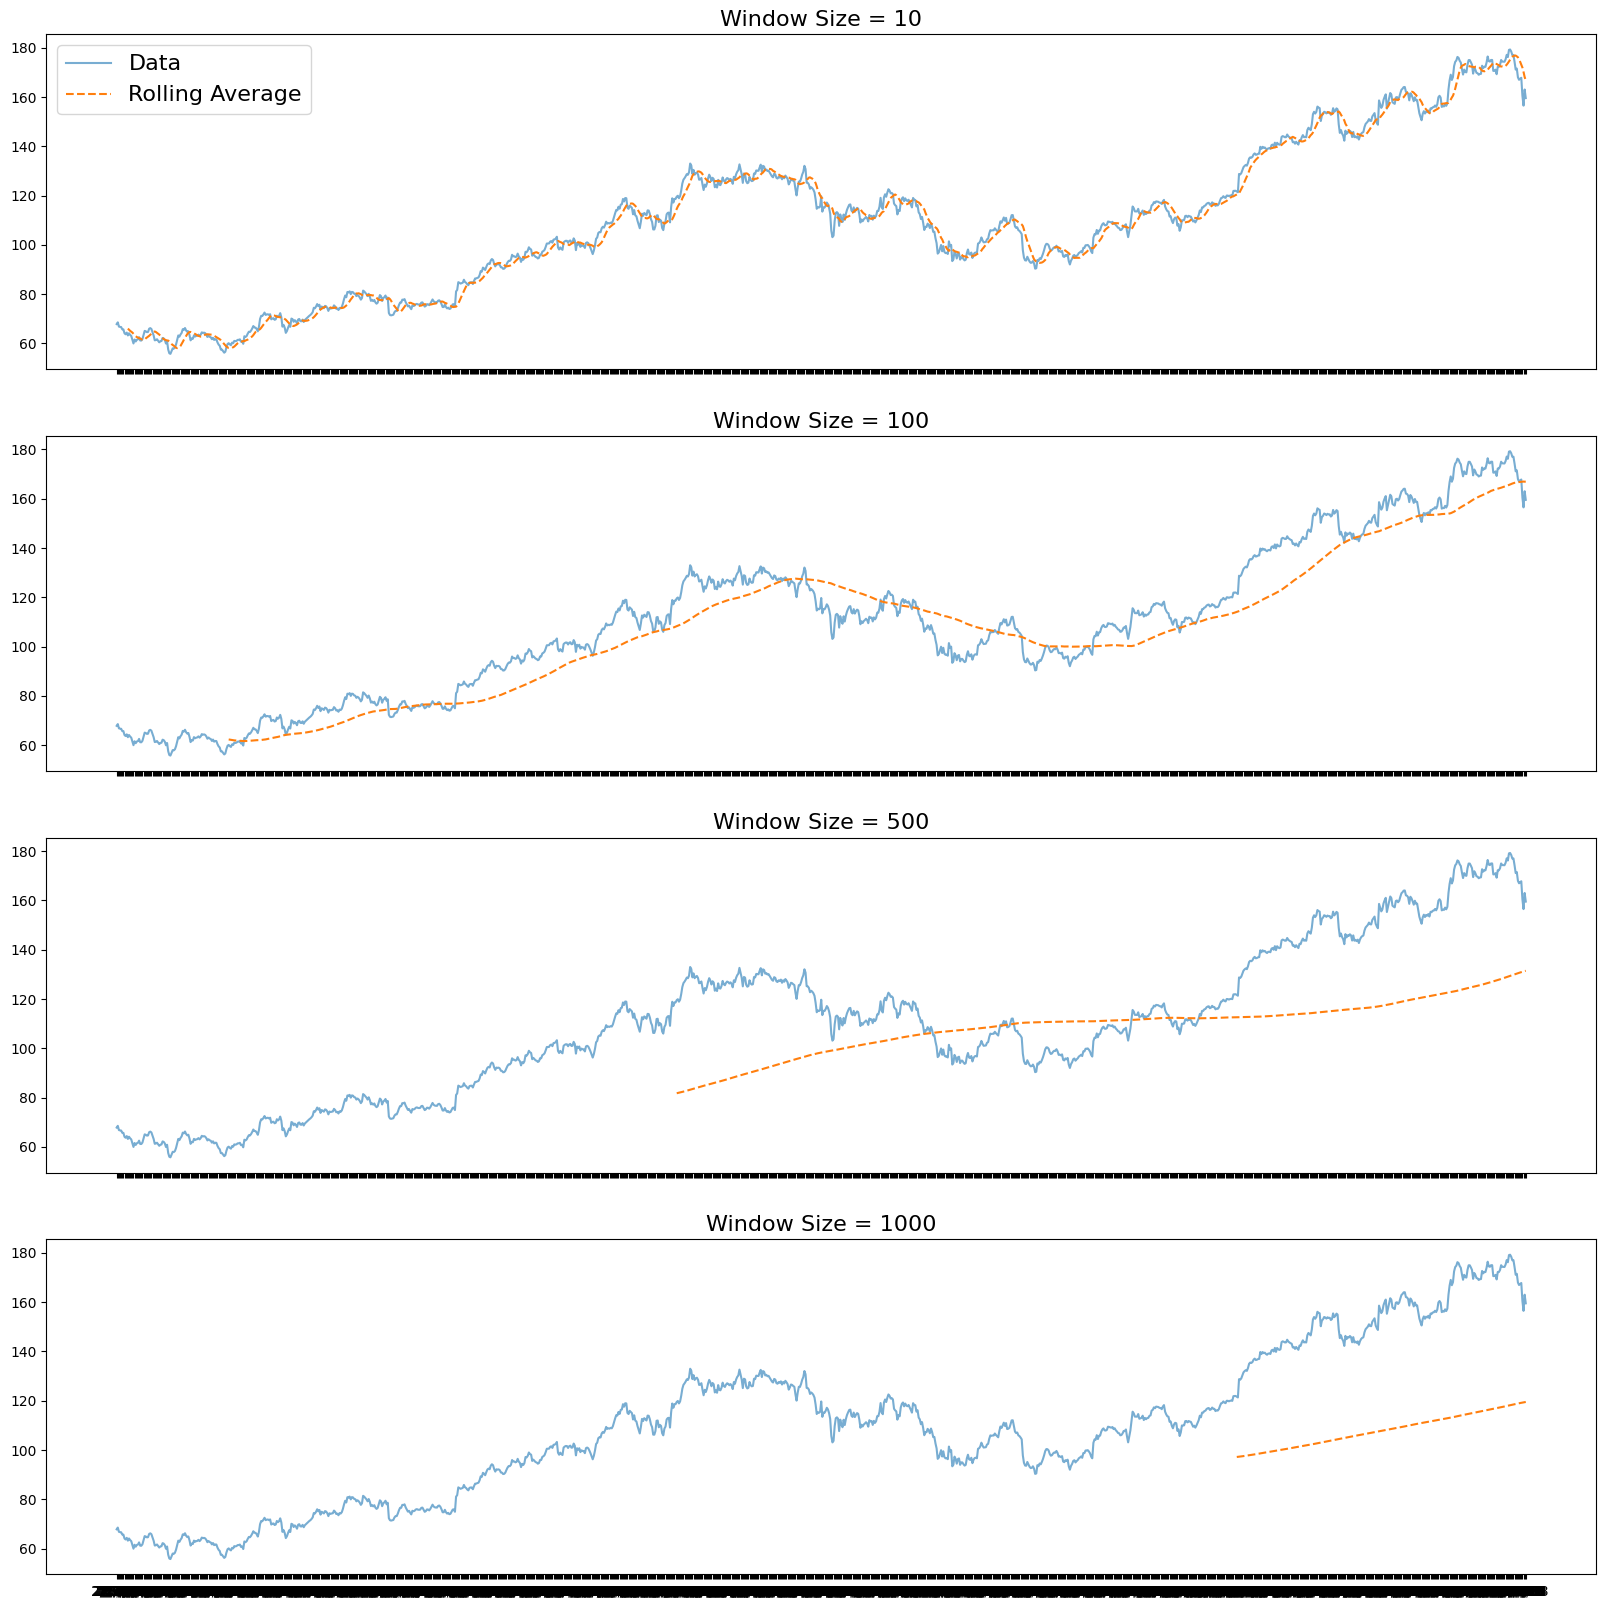

In [118]:
fig,ax = plt.subplots(4, 1, figsize=(20,20), sharex=True, sharey=True)

ax[0].plot(dt.date, 
           dt.close,
           alpha=.6,
           label="Data")
ax[0].plot(dt.date, 
           dt.close.rolling(10, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")

ax[0].legend(fontsize=16)
ax[0].set_title("Window Size = 10", fontsize=16)

ax[1].plot(dt.date, 
           dt.close,
           alpha=.6,
           label="Data")
ax[1].plot(dt.date, 
           dt.close.rolling(100, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[1].set_title("Window Size = 100", fontsize=16)


ax[2].plot(dt.date, 
           dt.close,
           alpha=.6,
           label="Data")
ax[2].plot(dt.date, 
           dt.close.rolling(500, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[2].set_title("Window Size = 500", fontsize=16)


ax[3].plot(dt.date, 
           dt.close,
           alpha=.6,
           label="Data")
ax[3].plot(dt.date, 
           dt.close.rolling(1000, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[3].set_title("Window Size = 1000", fontsize=16)




# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Close", fontsize=18)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

plt.show()

In [120]:
def weight_avg(t):
    return (2/3) * dt_train.close.values[t-1] + (1/6) * dt_train.close.values[t-2] + (1/6) * dt_train.close.values[t-3]

dt_train_fit = []

for i in range(3,len(dt_train)):
    dt_train_fit.append(weight_avg(i))
        
        
pred = weight_avg(len(dt_train))

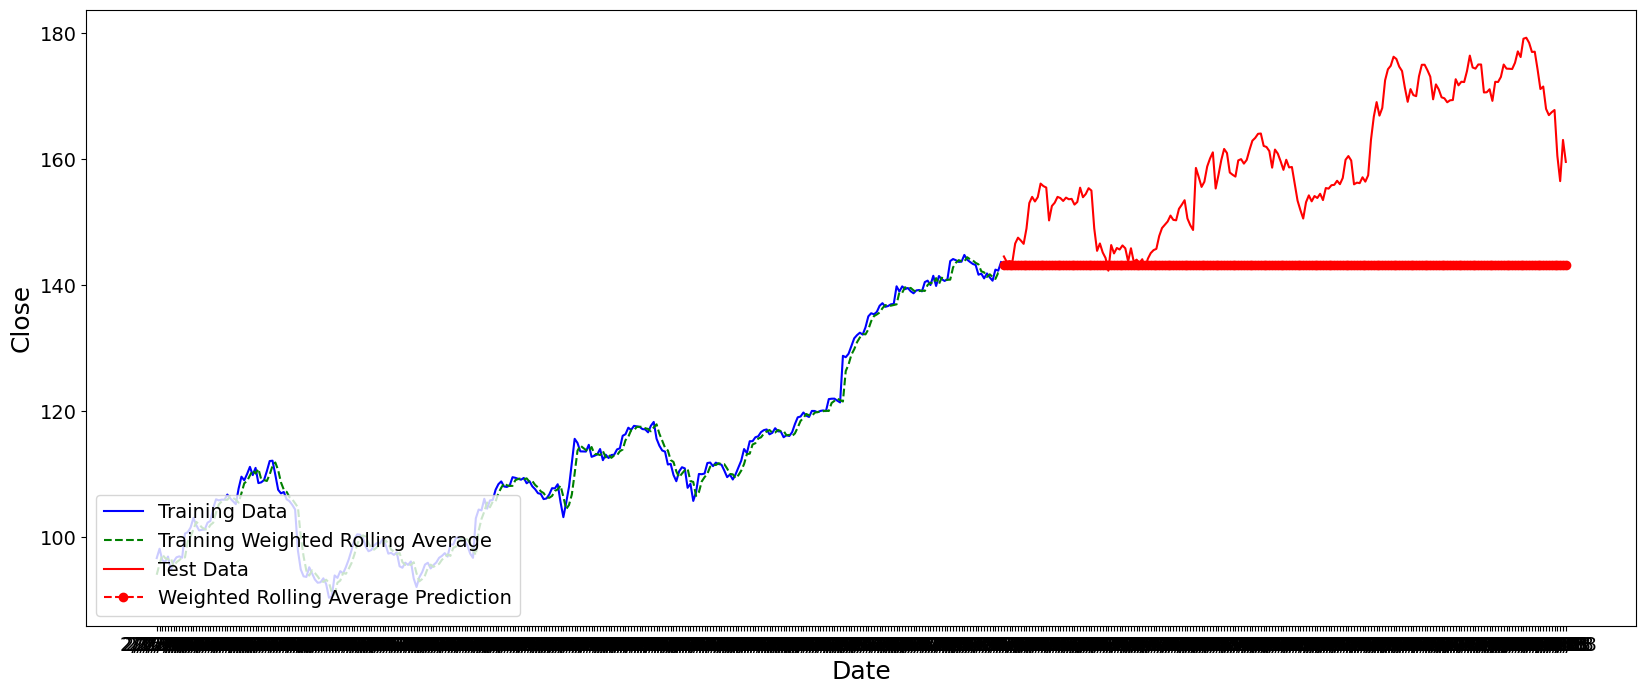

In [121]:
plt.figure(figsize=(20,8))


plt.plot(dt_train.date[-300:], 
         dt_train.close[-300:],
         'b',
         label="Training Data")



plt.plot(dt_train.date[-300:], 
         dt_train_fit[-300:],
         'g--',
         label="Training Weighted Rolling Average")

plt.plot(dt_test.date, 
         dt_test.close,
         'r',
         label="Test Data")

plt.plot(dt_test.date, 
         pred*np.ones(200),
         'r--o',
         label="Weighted Rolling Average Prediction")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Close", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()